# Inisialisasi Library

In [2667]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2668]:
train=pd.read_csv('train.csv')
target=pd.read_csv('target.csv')
test=pd.read_csv('test.csv')

In [2669]:
train = pd.concat([train,target["coppaRisk"]], axis =1)

# Exploratory Data Analysis

In [2670]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,coppaRisk
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,False
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,False
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,False
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,False
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,False


In [2671]:
target.head()

,coppaRisk
0,False
1,False
2,False
3,False
4,False


In [2672]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [2673]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [2674]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3000 non-null   int64  
 1   developerCountry                 3000 non-null   object 
 2   countryCode                      2971 non-null   object 
 3   userRatingCount                  3000 non-null   int64  
 4   primaryGenreName                 3000 non-null   object 
 5   downloads                        2119 non-null   object 
 6   deviceType                       3000 non-null   object 
 7   hasPrivacyLink                   2684 non-null   object 
 8   hasTermsOfServiceLink            1039 non-null   object 
 9   hasTermsOfServiceLinkRating      1039 non-null   object 
 10  isCorporateEmailScore            2560 non-null   float64
 11  adSpent                          574 non-null    float64
 12  appAge              

In [2675]:
# ? Data Size
print(f"Total size: {train.size} ")
print(f"Instances: {len(train.index)}")
print(f"Features: {len(train.columns)}")

Total size: 119000 
Instances: 7000
Features: 17


In [2676]:
# ? Data Size
print(f"Total size: {test.size} ")
print(f"Instances: {len(test.index)}")
print(f"Features: {len(test.columns)}")

Total size: 51000 
Instances: 3000
Features: 17


In [2677]:
train.describe()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,7.000000e+03,5872.000000,1.321000e+03,6950.000000,5768.000000
mean,3.256274e+04,45.740293,3.977563e+03,57.093060,2.482490
std,5.501431e+05,49.361215,9.219919e+04,37.169895,1.905712
min,0.000000e+00,0.000000,7.038525e-03,0.533333,0.000000
25%,0.000000e+00,0.000000,1.086920e+00,27.533333,0.000000
50%,1.000000e+00,0.000000,7.945580e+00,52.866667,3.000000
75%,8.800000e+01,99.000000,4.908375e+01,80.000000,4.000000
max,3.854334e+07,99.000000,3.143906e+06,196.466667,5.000000


In [2678]:
test.describe()

,ID,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,3000.000000,3.000000e+03,2560.000000,574.000000,2983.000000,2486.000000
mean,5016.298333,3.576905e+04,46.444922,286.612276,56.044396,2.490748
std,2894.991128,4.455556e+05,49.415285,1890.997697,36.417410,1.896230
min,1.000000,0.000000e+00,0.000000,0.007450,-1.200000,0.000000
25%,2495.750000,0.000000e+00,0.000000,1.121507,26.933333,0.000000
50%,4969.500000,1.000000e+00,0.000000,7.186537,51.933333,3.000000
75%,7585.500000,8.250000e+01,99.000000,44.878463,77.750000,4.000000
max,9999.000000,1.319941e+07,99.000000,37542.779693,194.466667,5.000000


In [2679]:
print("N amount of unqiue value from each categorical features")
train.nunique(axis = 0)

N amount of unqiue value from each categorical features


developerCountry                    114
countryCode                         119
userRatingCount                    1528
primaryGenreName                     46
downloads                            26
deviceType                            5
hasPrivacyLink                        2
hasTermsOfServiceLink                 2
hasTermsOfServiceLinkRating           2
isCorporateEmailScore                 2
adSpent                            1321
appAge                             3194
averageUserRating                     6
appContentBrandSafetyRating           3
appDescriptionBrandSafetyRating       3
mfaRating                             3
coppaRisk                             2
dtype: int64

In [2680]:
print("N amount of unqiue value from each categorical features")
test.nunique(axis = 0)

N amount of unqiue value from each categorical features


ID                                 3000
developerCountry                     89
countryCode                          92
userRatingCount                     763
primaryGenreName                     45
downloads                            21
deviceType                            5
hasPrivacyLink                        2
hasTermsOfServiceLink                 2
hasTermsOfServiceLinkRating           2
isCorporateEmailScore                 2
adSpent                             574
appAge                             2002
averageUserRating                     6
appContentBrandSafetyRating           3
appDescriptionBrandSafetyRating       3
mfaRating                             3
dtype: int64

### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [2681]:
for col in train: 
    print(f"{col} : {train [col].isnull().sum()/len(train)*100}")

developerCountry : 0.0
countryCode : 0.9142857142857144
userRatingCount : 0.0
primaryGenreName : 0.0
downloads : 30.7
deviceType : 0.0
hasPrivacyLink : 10.714285714285714
hasTermsOfServiceLink : 66.21428571428571
hasTermsOfServiceLinkRating : 66.21428571428571
isCorporateEmailScore : 16.114285714285714
adSpent : 81.12857142857143
appAge : 0.7142857142857143
averageUserRating : 17.599999999999998
appContentBrandSafetyRating : 88.02857142857144
appDescriptionBrandSafetyRating : 0.0
mfaRating : 0.0
coppaRisk : 0.0


In [2682]:
for col in test: 
    print(f"{col} : {test [col].isnull().sum()/len(test)*100}")

ID : 0.0
developerCountry : 0.0
countryCode : 0.9666666666666667
userRatingCount : 0.0
primaryGenreName : 0.0
downloads : 29.366666666666667
deviceType : 0.0
hasPrivacyLink : 10.533333333333333
hasTermsOfServiceLink : 65.36666666666666
hasTermsOfServiceLinkRating : 65.36666666666666
isCorporateEmailScore : 14.666666666666666
adSpent : 80.86666666666666
appAge : 0.5666666666666667
averageUserRating : 17.133333333333333
appContentBrandSafetyRating : 89.03333333333333
appDescriptionBrandSafetyRating : 0.0
mfaRating : 0.0


In [2683]:
import pandas as pd

# Fungsi untuk menghitung persentase outlier
def calculate_outlier_percentage(series):
    Q1 = series.quantile(0.25)  
    Q3 = series.quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100  # Persentase outlier
    return outlier_percentage
numeric_cols = train.select_dtypes(include=['number']).columns

outlier_threshold = 5  
outlier_results = []

for col in numeric_cols:
    outlier_percentage = calculate_outlier_percentage(train[col])  # Persentase outlier per kolom
    significant_outlier = "Signifikan" if outlier_percentage > outlier_threshold else "Tidak Signifikan"
    outlier_results.append({'Column': col, 'Outlier Percentage': outlier_percentage, 'Significance': significant_outlier})

outlier_df = pd.DataFrame(outlier_results)

print(outlier_df)


                  Column  Outlier Percentage      Significance
0        userRatingCount           20.771429        Signifikan
1  isCorporateEmailScore            0.000000  Tidak Signifikan
2                adSpent            3.185714  Tidak Signifikan
3                 appAge            1.142857  Tidak Signifikan
4      averageUserRating            0.000000  Tidak Signifikan


In [2684]:
numeric_cols1 = test.select_dtypes(include=['number']).columns

outlier_threshold = 5  
outlier_results = []

for col in numeric_cols1:
    outlier_percentage = calculate_outlier_percentage(test[col])  # Persentase outlier per kolom
    significant_outlier = "Signifikan" if outlier_percentage > outlier_threshold else "Tidak Signifikan"
    outlier_results.append({'Column': col, 'Outlier Percentage': outlier_percentage, 'Significance': significant_outlier})

outlier_df = pd.DataFrame(outlier_results)

print(outlier_df)

                  Column  Outlier Percentage      Significance
0                     ID            0.000000  Tidak Signifikan
1        userRatingCount           21.066667        Signifikan
2  isCorporateEmailScore            0.000000  Tidak Signifikan
3                adSpent            3.100000  Tidak Signifikan
4                 appAge            1.333333  Tidak Signifikan
5      averageUserRating            0.000000  Tidak Signifikan


In [2685]:
duplicate_count = train.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 3


In [2686]:
duplicate_count = test.duplicated().sum()

print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 0


In [2687]:
for i in train.columns:
    print("Kolom " + i + " berisi:\n")
    print(train[i].value_counts())

Kolom developerCountry berisi:

developerCountry
ADDRESS NOT LISTED IN PLAYSTORE    4338
CANNOT IDENTIFY COUNTRY             769
UNITED STATES                       324
CHINA                               150
INDIA                               131
                                   ... 
KYRGYZSTAN                            1
BELARUS                               1
LEBANON                               1
MALDIVES                              1
STATUTORY MASKING ENABLED             1
Name: count, Length: 114, dtype: int64
Kolom countryCode berisi:

countryCode
GLOBAL    5802
US          74
EMEA        73
APAC        64
LATAM       45
          ... 
MA           1
CM           1
RE           1
LK           1
IR           1
Name: count, Length: 119, dtype: int64
Kolom userRatingCount berisi:

userRatingCount
0         3338
1          238
6          123
5          117
7          100
          ... 
3097         1
15157        1
6743         1
134386       1
1600         1
Name: count, Leng

In [2688]:
for i in test.columns:
    print("Kolom " + i + " berisi:\n")
    print(test[i].value_counts())

Kolom ID berisi:

ID
6406    1
2807    1
1742    1
806     1
2635    1
       ..
7086    1
1680    1
331     1
958     1
7045    1
Name: count, Length: 3000, dtype: int64
Kolom developerCountry berisi:

developerCountry
ADDRESS NOT LISTED IN PLAYSTORE    1821
CANNOT IDENTIFY COUNTRY             331
UNITED STATES                       179
CHINA                                71
INDIA                                55
                                   ... 
ARMENIA                               1
SLOVENIA                              1
NORWAY                                1
NIGER                                 1
CROATIA                               1
Name: count, Length: 89, dtype: int64
Kolom countryCode berisi:

countryCode
GLOBAL    2470
US          41
APAC        27
EMEA        25
MX          19
          ... 
ZW           1
CN           1
KH           1
LY           1
NP           1
Name: count, Length: 92, dtype: int64
Kolom userRatingCount berisi:

userRatingCount
0         141

### Step 3 (Analisis Statistik)

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

In [2689]:
import pandas as pd
import numpy as np

# Ambil hanya kolom numerik
kolom_numerik = train.select_dtypes(include=["int64", "float64"])

# Hitung skewness untuk setiap kolom
nilai_skew = kolom_numerik.skew().sort_values(ascending=False)

# Fungsi interpretasi + solusi untuk setiap jenis skew
def interpretasi_dan_solusi(val):
    if val > 1:
        return "Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox."
    elif val > 0.5:
        return "Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu."
    elif val > -0.5:
        return "Hampir simetris (normal). Tidak perlu diubah."
    elif val > -1:
        return "Agak miring ke kiri. Bisa dicoba kuadrat atau transformasi ringan lainnya jika perlu."
    else:
        return "Sangat miring ke kiri (negatif). Gunakan transformasi: kuadrat, pangkat tiga, atau mirror + log."

# Buat DataFrame hasil
hasil_skew = pd.DataFrame({
    'Fitur': nilai_skew.index,
    'Nilai Skewness': nilai_skew.values,
    'Interpretasi dan Solusi': nilai_skew.apply(interpretasi_dan_solusi)
})

# Tampilkan hasil akhir
print(hasil_skew.to_string(index=False))


                Fitur  Nilai Skewness                                                          Interpretasi dan Solusi
      userRatingCount       53.284682 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
              adSpent       31.303509 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
               appAge        0.703034  Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu.
isCorporateEmailScore        0.152386                                    Hampir simetris (normal). Tidak perlu diubah.
    averageUserRating       -0.337420                                    Hampir simetris (normal). Tidak perlu diubah.


In [2690]:
# Ambil hanya kolom numerik
kolom_numerik = test.select_dtypes(include=["int64", "float64"])

# Hitung skewness untuk setiap kolom
nilai_skew = kolom_numerik.skew().sort_values(ascending=False)
# Buat DataFrame hasil
hasil_skew = pd.DataFrame({
    'Fitur': nilai_skew.index,
    'Nilai Skewness': nilai_skew.values,
    'Interpretasi dan Solusi': nilai_skew.apply(interpretasi_dan_solusi)
})

# Tampilkan hasil akhir
print(hasil_skew.to_string(index=False))


                Fitur  Nilai Skewness                                                          Interpretasi dan Solusi
      userRatingCount       22.416585 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
              adSpent       14.984735 Sangat miring ke kanan (positif). Gunakan transformasi: log, sqrt, atau Box-Cox.
               appAge        0.719044  Agak miring ke kanan. Disarankan transformasi ringan: log atau sqrt jika perlu.
isCorporateEmailScore        0.123746                                    Hampir simetris (normal). Tidak perlu diubah.
                   ID       -0.010133                                    Hampir simetris (normal). Tidak perlu diubah.
    averageUserRating       -0.353033                                    Hampir simetris (normal). Tidak perlu diubah.


#### Numerik-Numerik

{'userRatingCount': ['adSpent'], 'isCorporateEmailScore': [], 'adSpent': ['userRatingCount'], 'appAge': [], 'averageUserRating': []}


{'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


<Axes: >

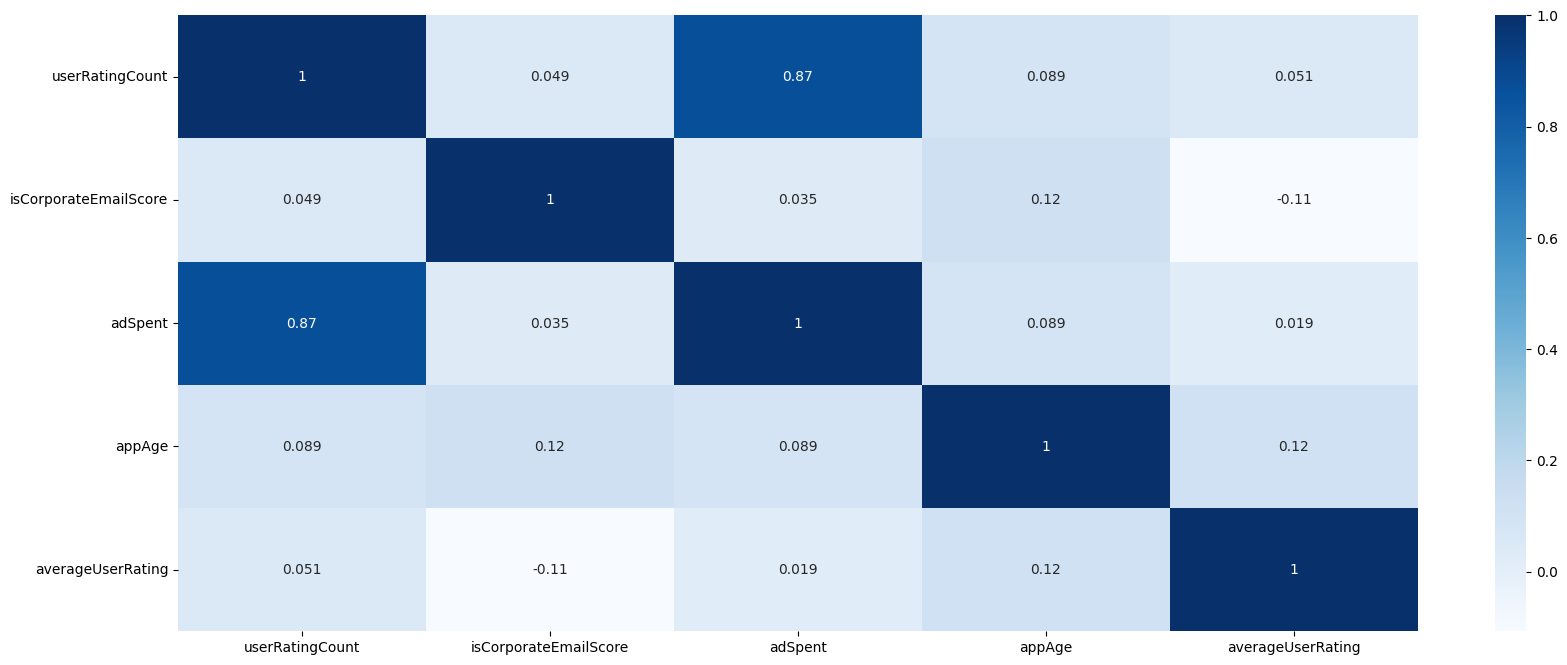

In [2691]:
corr = train.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

{'ID': [], 'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


{'ID': [], 'userRatingCount': [], 'isCorporateEmailScore': [], 'adSpent': [], 'appAge': [], 'averageUserRating': []}


<Axes: >

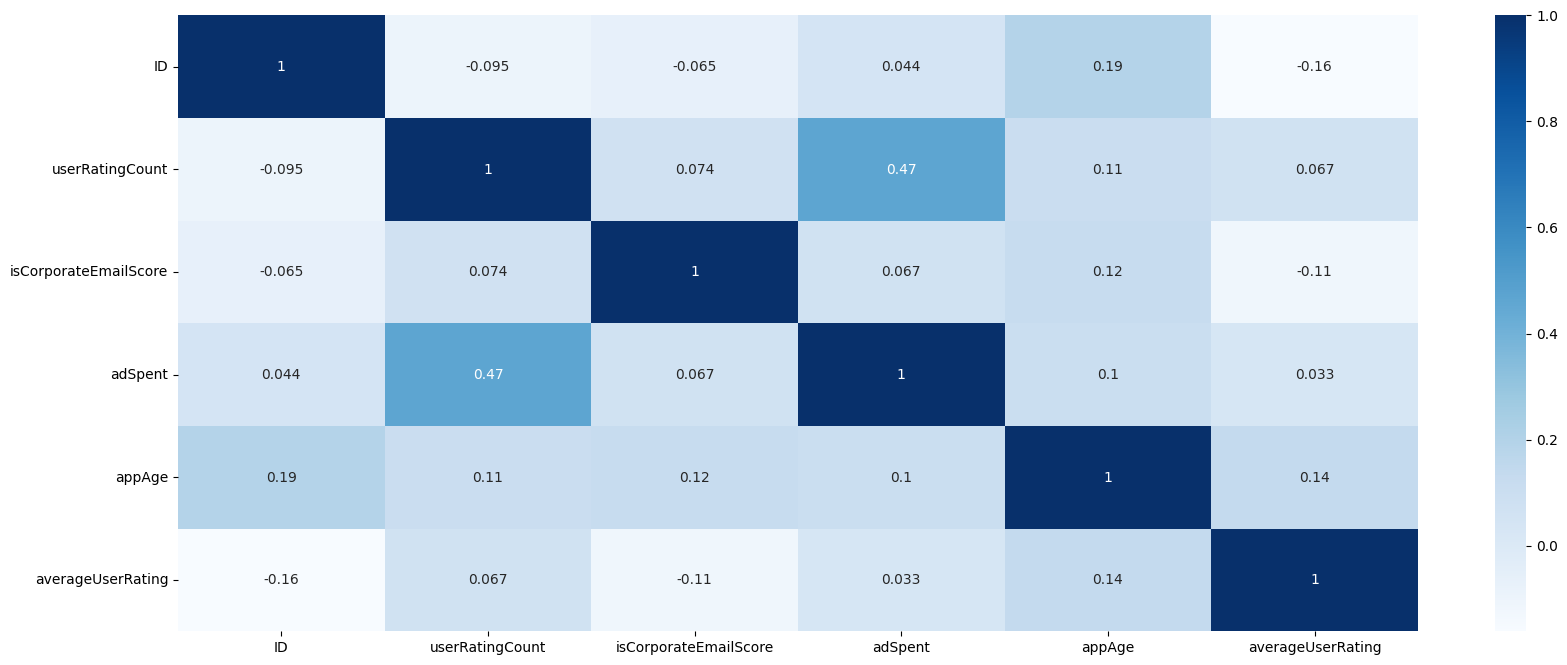

In [2692]:
corr = test.select_dtypes(include = ["int64","float64"]).corr()
plt.figure(figsize=(20,8))
var = corr.columns
n = len(var)
pos = dict()
neg = dict()
for i in var:
    pos[i] = list()
    neg[i] = list()

for i in var:
    for j in range(n):
        if i == var[j]: continue
        if corr[i].iloc[j] > 0.7:
            pos[i].append(var[j])
        if corr[i].iloc[j] < -0.7:
            neg[i].append(var[j])

print(pos)
print("\n")
print(neg)
            
sns.heatmap(corr, cmap="Blues",annot=True)

#### Numerik - Kategorikal

In [2693]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi ANOVA Test
def anova_test(df, cat_col, num_col):
    try:
        groups = [group[num_col].values for name, group in df.groupby(cat_col)]
        f_stat, p_val = stats.f_oneway(*groups)
        return f_stat, p_val
    except:
        return np.nan, np.nan

# Fungsi Eta Squared (Correlation Ratio)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    if denominator == 0:
        return 0.0
    return np.sqrt(numerator / denominator)

# Misal dataframe kamu bernama train
# 1. Pisahkan kolom kategorikal dan numerik
cat_cols = train.select_dtypes(include=['object', 'bool']).columns
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

# 2. Simpan hasil ke list
results = []

for cat in cat_cols:
    for num in num_cols:
        df_temp = train[[cat, num]].dropna()
        if df_temp[cat].nunique() > 1 and df_temp[num].nunique() > 1:
            f_stat, p_val = anova_test(df_temp, cat, num)
            eta = correlation_ratio(df_temp[cat], df_temp[num].values)
            results.append({
                'Categorical': cat,
                'Numerical': num,
                'F-Statistic': round(f_stat, 4),
                'p-value': round(p_val, 4),
                'Eta': round(eta, 4)
            })

# 3. Konversi hasil ke dataframe
result_df = pd.DataFrame(results)
result_df.sort_values(by='Eta', ascending=False, inplace=True)

# Tampilkan hasil
result_df


,Categorical,Numerical,F-Statistic,p-value,Eta
15,downloads,userRatingCount,2656.2201,0.0000,0.9655
17,downloads,adSpent,398.5395,0.0000,0.9397
2,developerCountry,adSpent,16.5678,0.0000,0.6641
0,developerCountry,userRatingCount,35.0434,0.0000,0.6042
19,downloads,averageUserRating,47.6715,0.0000,0.4991
14,primaryGenreName,averageUserRating,19.4330,0.0000,0.3641
11,primaryGenreName,isCorporateEmailScore,18.4849,0.0000,0.3500
1,developerCountry,isCorporateEmailScore,5.5179,0.0000,0.3126
9,countryCode,averageUserRating,4.8696,0.0000,0.3054
3,developerCountry,appAge,4.3319,0.0000,0.2585


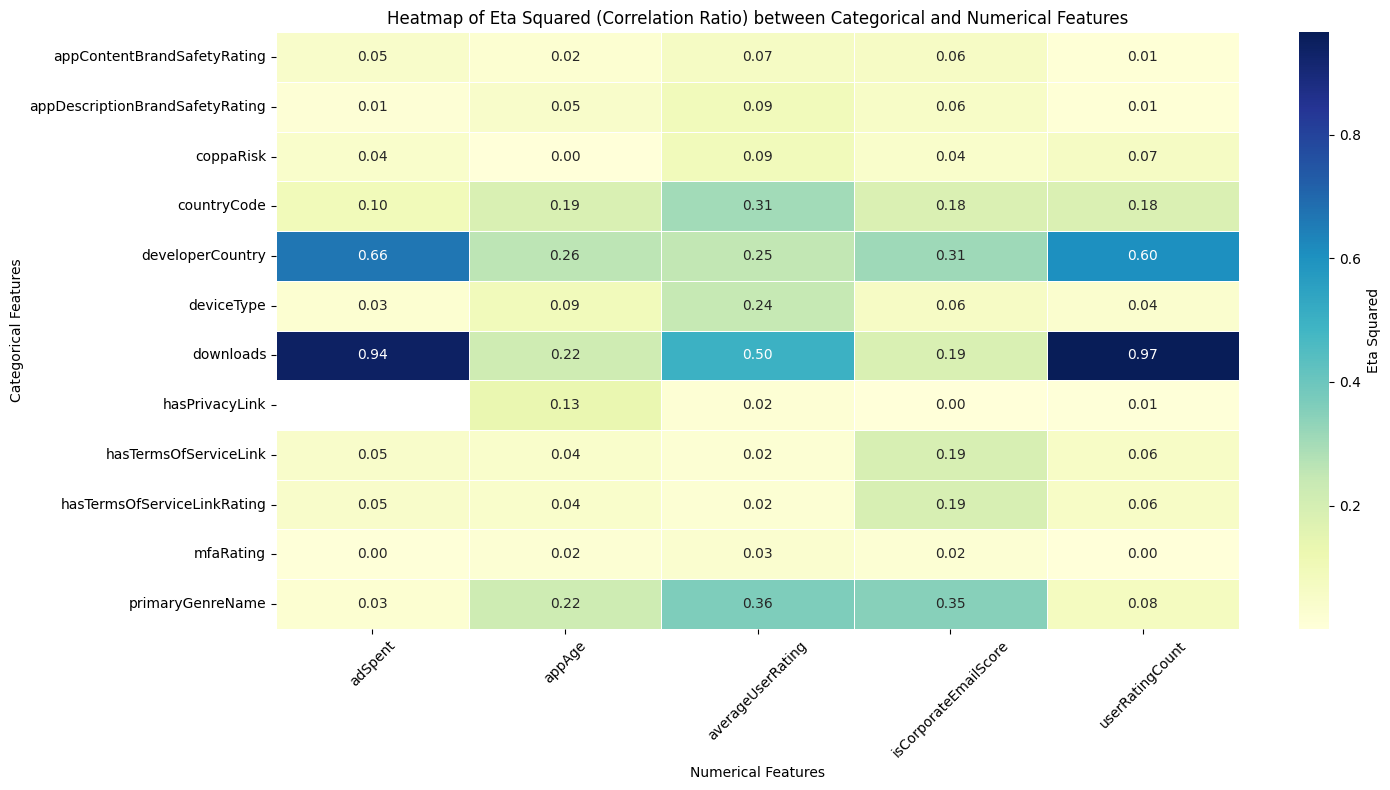

In [2694]:

# Buat pivot table agar bisa divisualisasikan sebagai heatmap
pivot_eta = result_df.pivot(index='Categorical', columns='Numerical', values='Eta')

# Plot heatmap
plt.figure(figsize=(15, 8))  # Ukuran heatmap bisa diubah sesuai kebutuhan
sns.heatmap(pivot_eta, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Eta Squared'})

plt.title("Heatmap of Eta Squared (Correlation Ratio) between Categorical and Numerical Features")
plt.ylabel("Categorical Features")
plt.xlabel("Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2695]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi ANOVA Test
def anova_test(df, cat_col, num_col):
    try:
        groups = [group[num_col].values for name, group in df.groupby(cat_col)]
        f_stat, p_val = stats.f_oneway(*groups)
        return f_stat, p_val
    except:
        return np.nan, np.nan

# Fungsi Eta Squared (Correlation Ratio)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    if denominator == 0:
        return 0.0
    return np.sqrt(numerator / denominator)

# Misal dataframe kamu bernama train
# 1. Pisahkan kolom kategorikal dan numerik
cat_cols = test.select_dtypes(include=['object', 'bool']).columns
num_cols = test.select_dtypes(include=['int64', 'float64']).columns

# 2. Simpan hasil ke list
results = []

for cat in cat_cols:
    for num in num_cols:
        df_temp = test[[cat, num]].dropna()
        if df_temp[cat].nunique() > 1 and df_temp[num].nunique() > 1:
            f_stat, p_val = anova_test(df_temp, cat, num)
            eta = correlation_ratio(df_temp[cat], df_temp[num].values)
            results.append({
                'Categorical': cat,
                'Numerical': num,
                'F-Statistic': round(f_stat, 4),
                'p-value': round(p_val, 4),
                'Eta': round(eta, 4)
            })

# 3. Konversi hasil ke dataframe
result_df1 = pd.DataFrame(results)
result_df1.sort_values(by='Eta', ascending=False, inplace=True)

# Tampilkan hasil
result_df1


,Categorical,Numerical,F-Statistic,p-value,Eta
19,downloads,userRatingCount,156.0079,0.0000,0.7733
18,downloads,ID,68.7708,0.0000,0.6293
6,countryCode,ID,18.7342,0.0000,0.6099
23,downloads,averageUserRating,28.2805,0.0000,0.5130
3,developerCountry,adSpent,3.2528,0.0000,0.4911
...,...,...,...,...,...
31,hasPrivacyLink,userRatingCount,0.2313,0.6306,0.0093
62,mfaRating,adSpent,0.0242,0.9761,0.0092
35,hasTermsOfServiceLink,ID,0.0264,0.8709,0.0050
41,hasTermsOfServiceLinkRating,ID,0.0264,0.8709,0.0050


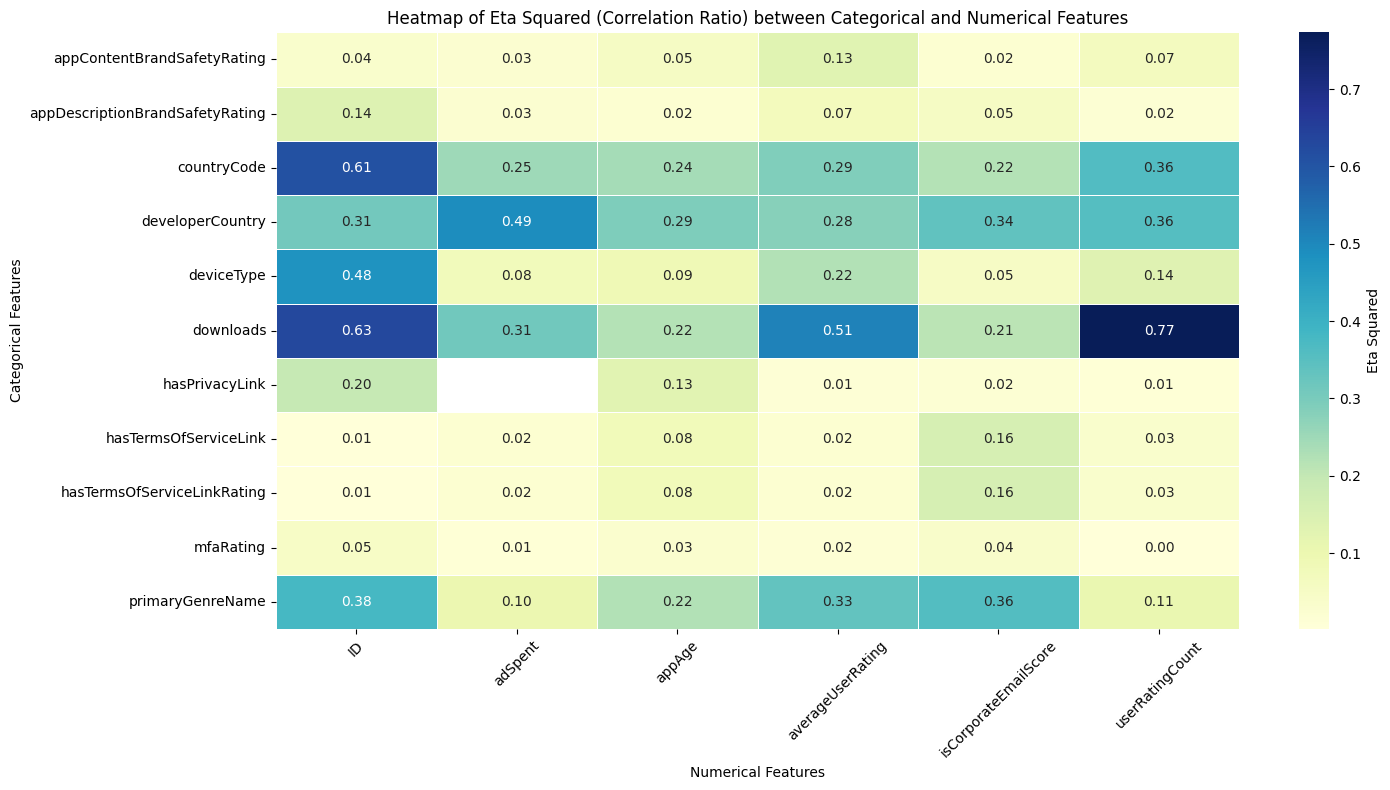

In [2696]:

# Buat pivot table agar bisa divisualisasikan sebagai heatmap
pivot_eta = result_df1.pivot(index='Categorical', columns='Numerical', values='Eta')

# Plot heatmap
plt.figure(figsize=(15, 8))  # Ukuran heatmap bisa diubah sesuai kebutuhan
sns.heatmap(pivot_eta, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Eta Squared'})

plt.title("Heatmap of Eta Squared (Correlation Ratio) between Categorical and Numerical Features")
plt.ylabel("Categorical Features")
plt.xlabel("Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2697]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = ['countryCode', 'developerCountry', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
            'downloads','appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'hasPrivacyLink']

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        v = cramers_v(test[cat_cols[i]], test[cat_cols[j]])
        if v > 0.7:
            print(f"Cramér’s V antara '{cat_cols[i]}' dan '{cat_cols[j]}' = {v:.2f} → POTENSI pseudo-multikolinearitas")


Cramér’s V antara 'hasTermsOfServiceLink' dan 'hasTermsOfServiceLinkRating' = 1.00 → POTENSI pseudo-multikolinearitas


In [2698]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = ['countryCode', 'developerCountry', 'hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating',
            'downloads','appContentBrandSafetyRating', 'appDescriptionBrandSafetyRating', 'hasPrivacyLink']

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        v = cramers_v(test[cat_cols[i]], test[cat_cols[j]])
        if v > 0.7:
            print(f"Cramér’s V antara '{cat_cols[i]}' dan '{cat_cols[j]}' = {v:.2f} → POTENSI pseudo-multikolinearitas")


Cramér’s V antara 'hasTermsOfServiceLink' dan 'hasTermsOfServiceLinkRating' = 1.00 → POTENSI pseudo-multikolinearitas


#### Kategorikal - Kategorikal 

In [2699]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Load data (assuming the dataframe was named df_train earlier)
df_train = train.copy()

# Select categorical columns only
categorical_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Prepare results
chi2_results = []

# Loop through pairs of categorical columns
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i + 1:]:
        # Create contingency table
        contingency_table = pd.crosstab(df_train[col1], df_train[col2])

        # Only compute chi2 if both columns have more than 1 category
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_results.append({
                    'Feature 1': col1,
                    'Feature 2': col2,
                    'Chi2 Statistic': chi2,
                    'p-value': p
                })
            except:
                continue

# Convert results to DataFrame and sort by Chi2 Statistic
chi2_df = pd.DataFrame(chi2_results).sort_values(by='Chi2 Statistic', ascending=False).reset_index(drop=True)
chi2_df.head(10)  # Show top 10 results



,Feature 1,Feature 2,Chi2 Statistic,p-value
0,developerCountry,countryCode,18270.917915,1.338840e-162
1,developerCountry,downloads,9140.242061,0.000000e+00
2,countryCode,downloads,7632.659935,0.000000e+00
3,developerCountry,primaryGenreName,5893.646745,1.123794e-14
4,countryCode,primaryGenreName,3882.565494,1.000000e+00
5,countryCode,deviceType,3111.417512,0.000000e+00
6,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,2360.827743,0.000000e+00
7,primaryGenreName,downloads,1912.638911,1.354951e-97
8,downloads,deviceType,1619.591058,1.157789e-272
9,developerCountry,deviceType,1407.972183,1.074758e-98


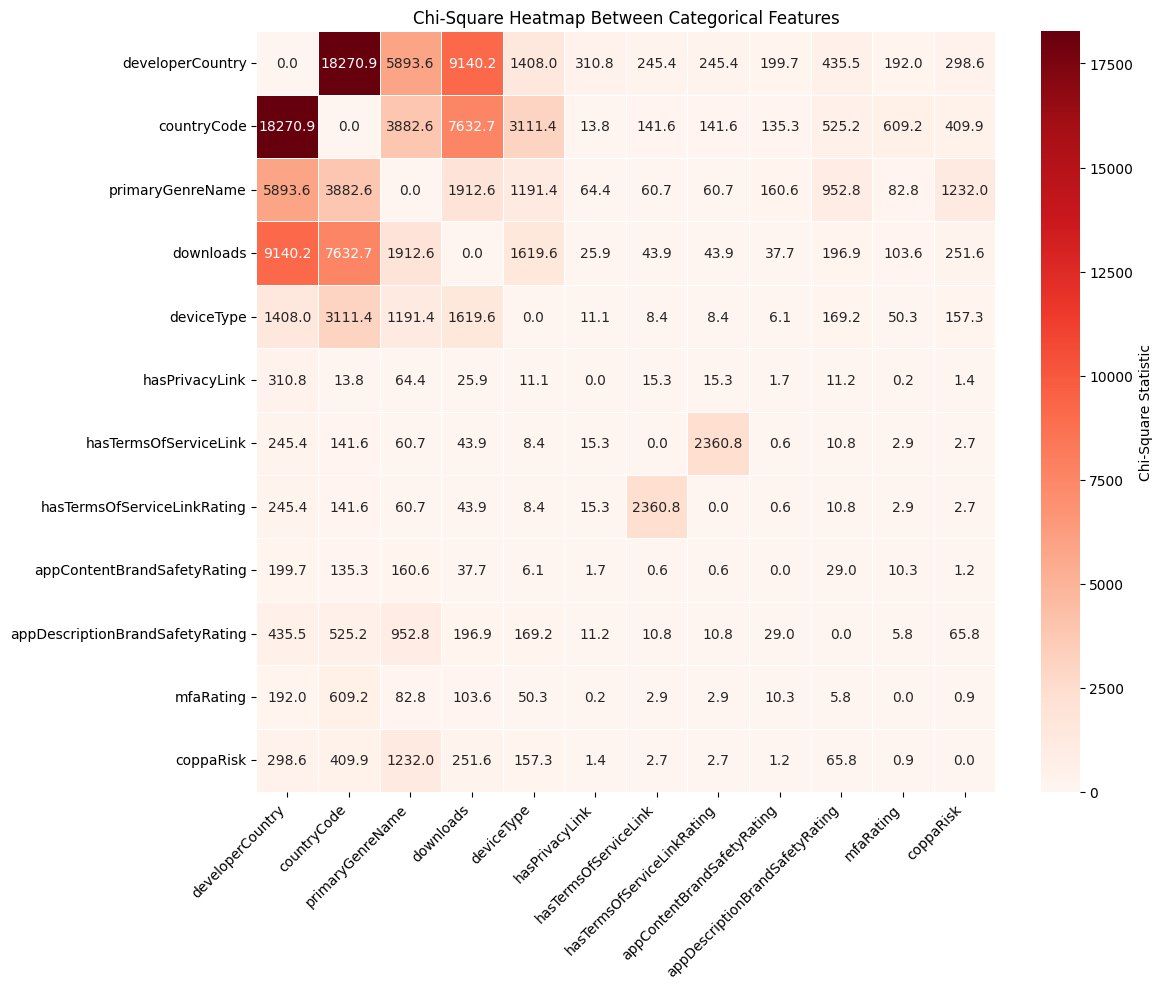

In [2700]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat matriks simetris dari hasil Chi-Square
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Isi matriks dengan nilai Chi2 Statistic
for _, row in chi2_df.iterrows():
    f1, f2, chi2_val = row['Feature 1'], row['Feature 2'], row['Chi2 Statistic']
    chi2_matrix.loc[f1, f2] = chi2_val
    chi2_matrix.loc[f2, f1] = chi2_val  # Karena chi2 simetris

# Optional: ganti diagonal dengan nol atau NaN
for col in categorical_cols:
    chi2_matrix.loc[col, col] = 0

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Chi-Square Statistic'})

plt.title("Chi-Square Heatmap Between Categorical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2701]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Load data (assuming the dataframe was named df_train earlier)
df_train = test.copy()

# Select categorical columns only
categorical_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Prepare results
chi2_results = []

# Loop through pairs of categorical columns
for i, col1 in enumerate(categorical_cols):
    for col2 in categorical_cols[i + 1:]:
        # Create contingency table
        contingency_table = pd.crosstab(df_train[col1], df_train[col2])

        # Only compute chi2 if both columns have more than 1 category
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            try:
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                chi2_results.append({
                    'Feature 1': col1,
                    'Feature 2': col2,
                    'Chi2 Statistic': chi2,
                    'p-value': p
                })
            except:
                continue

# Convert results to DataFrame and sort by Chi2 Statistic
chi3_df = pd.DataFrame(chi2_results).sort_values(by='Chi2 Statistic', ascending=False).reset_index(drop=True)
chi3_df.head(10)  # Show top 10 results



,Feature 1,Feature 2,Chi2 Statistic,p-value
0,developerCountry,countryCode,12740.630034,6.668938e-223
1,countryCode,downloads,4657.435504,1.248884e-268
2,developerCountry,primaryGenreName,3597.130329,9.992961e-01
3,developerCountry,downloads,2309.272099,1.190868e-25
4,countryCode,primaryGenreName,2094.456532,1.000000e+00
5,countryCode,deviceType,1595.393313,2.229929e-153
6,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,1034.764724,4.986498e-227
7,primaryGenreName,downloads,985.510694,4.002577e-19
8,countryCode,mfaRating,908.793930,5.632822e-97
9,downloads,deviceType,840.781907,3.031042e-127


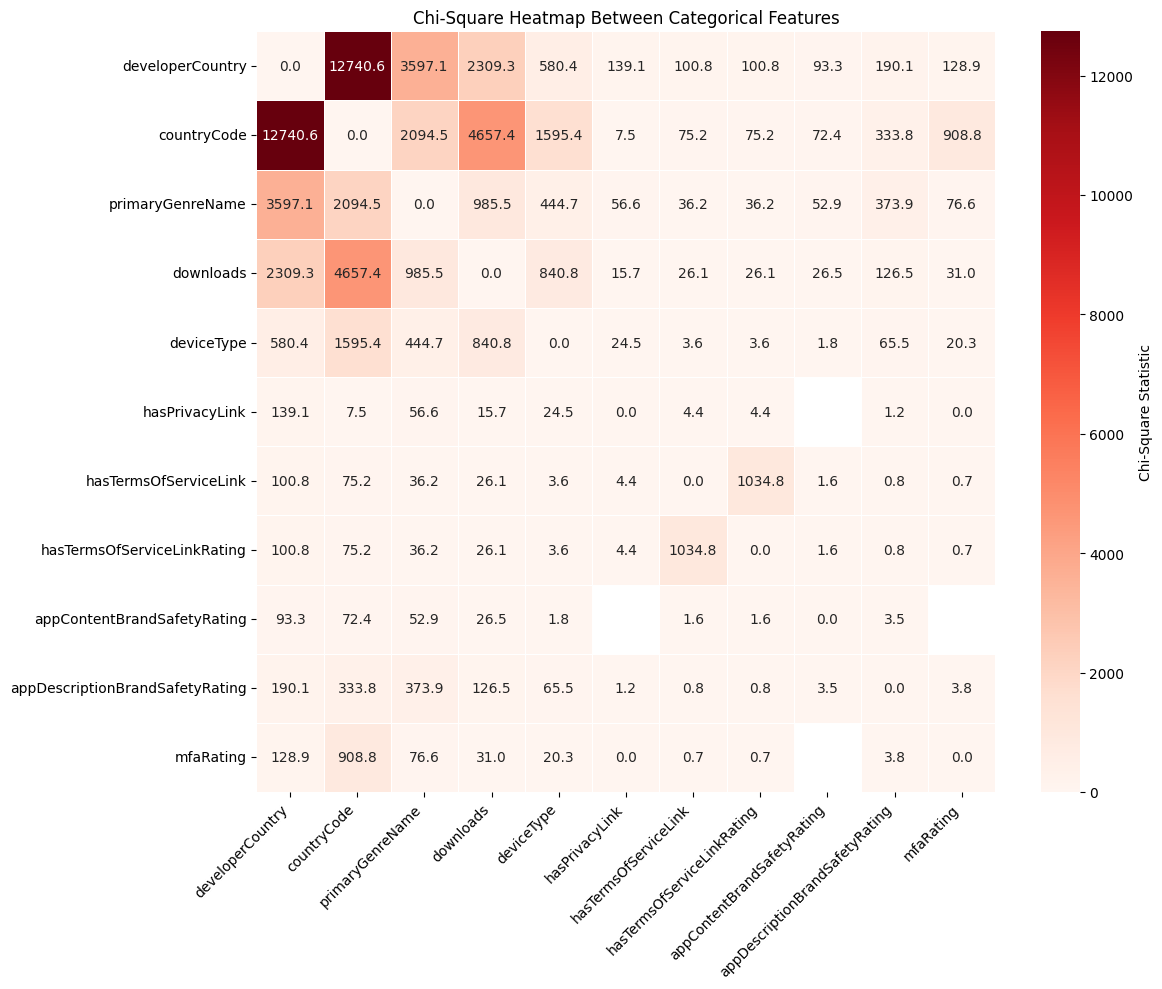

In [2702]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat matriks simetris dari hasil Chi-Square
chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# Isi matriks dengan nilai Chi2 Statistic
for _, row in chi3_df.iterrows():
    f1, f2, chi2_val = row['Feature 1'], row['Feature 2'], row['Chi2 Statistic']
    chi2_matrix.loc[f1, f2] = chi2_val
    chi2_matrix.loc[f2, f1] = chi2_val  # Karena chi2 simetris

# Optional: ganti diagonal dengan nol atau NaN
for col in categorical_cols:
    chi2_matrix.loc[col, col] = 0

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Chi-Square Statistic'})

plt.title("Chi-Square Heatmap Between Categorical Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

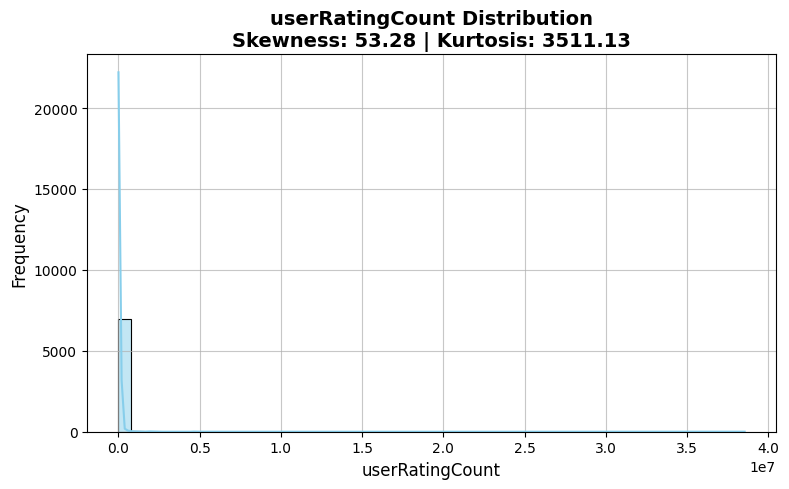

Interpretasi userRatingCount:
➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.
📈 Distribusi lebih runcing dari normal (leptokurtic).



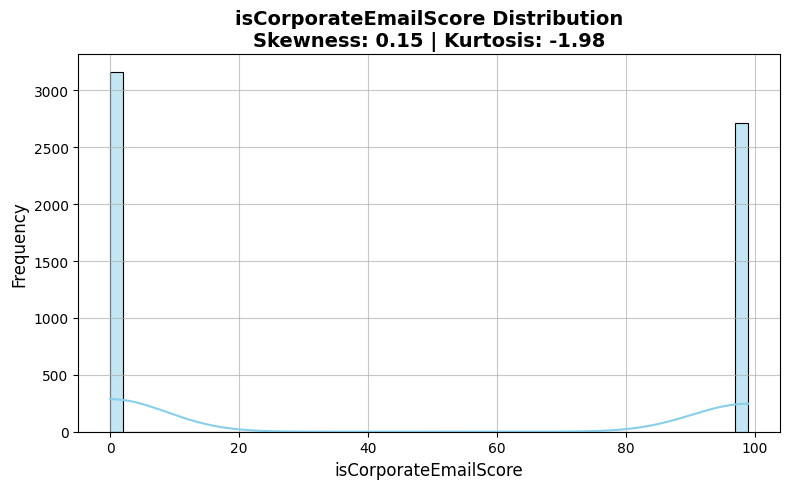

Interpretasi isCorporateEmailScore:
➡️ Distribusi mendekati simetris (Skewness: 0.15)
📉 Distribusi lebih datar dari normal (platykurtic).



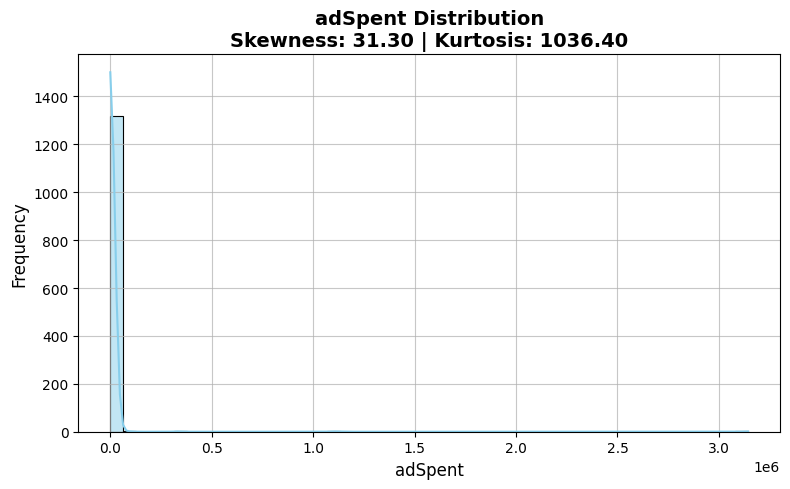

Interpretasi adSpent:
➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.
📈 Distribusi lebih runcing dari normal (leptokurtic).



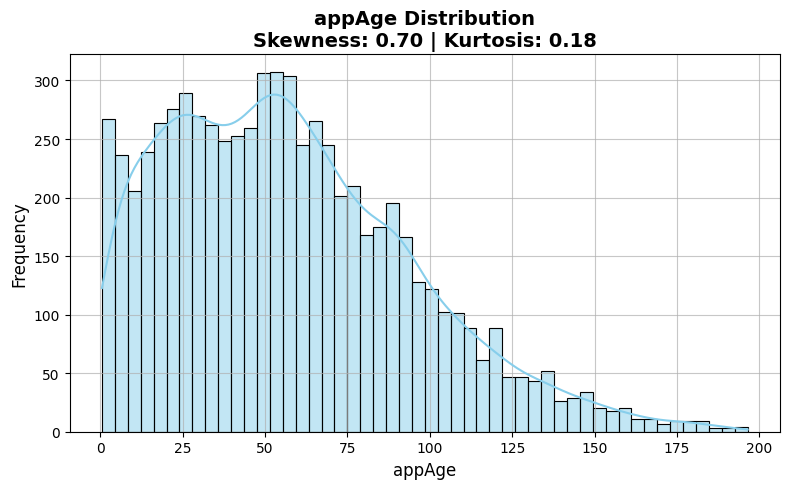

Interpretasi appAge:
➡️ Distribusi agak condong ke kanan (moderate positive skew).
📉 Distribusi lebih datar dari normal (platykurtic).



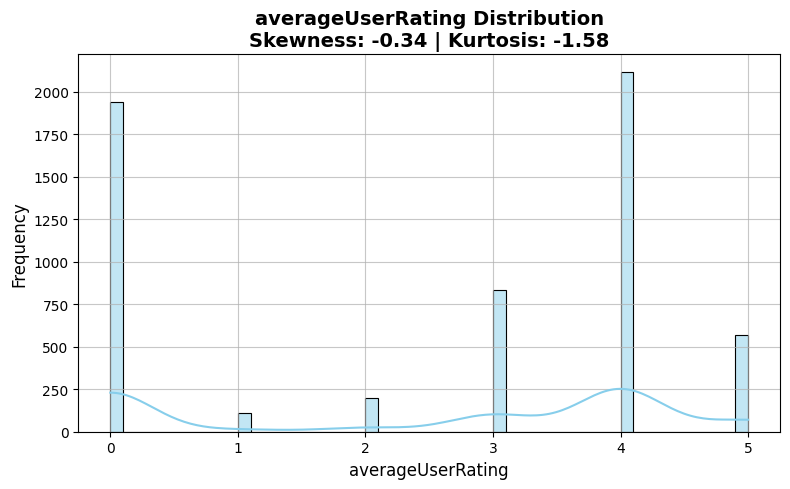

Interpretasi averageUserRating:
➡️ Distribusi mendekati simetris (Skewness: -0.34)
📉 Distribusi lebih datar dari normal (platykurtic).



In [2703]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil semua kolom numerik dari data train
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns

# Loop untuk menampilkan distribusi tiap kolom
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train[col], bins=50, kde=True, color='skyblue')
    
    # Hitung skewness dan kurtosis
    skewness = train[col].skew()
    kurtosis = train[col].kurtosis()
    
    # Judul plot
    plt.title(f'{col} Distribution\nSkewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}',
              fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Interpretasi skewness
    print(f'\033[1mInterpretasi {col}:\033[0m')
    if abs(skewness) < 0.5:
        print(f"➡️ Distribusi mendekati simetris (Skewness: {skewness:.2f})")
    elif skewness > 0.5 and skewness <= 1:
        print(f"➡️ Distribusi agak condong ke kanan (moderate positive skew).")
    elif skewness > 1:
        print(f"➡️ Distribusi sangat condong ke kanan (highly positive skew). Disarankan transformasi: log, sqrt, atau Box-Cox.")
    elif skewness < -0.5 and skewness >= -1:
        print(f"➡️ Distribusi agak condong ke kiri (moderate negative skew).")
    else:
        print(f"➡️ Distribusi sangat condong ke kiri (highly negative skew). Disarankan transformasi: pangkat dua, pangkat tiga, atau mirror+log.")

    # Interpretasi kurtosis
    if kurtosis > 3:
        print(f"📈 Distribusi lebih runcing dari normal (leptokurtic).\n")
    elif kurtosis < 3:
        print(f"📉 Distribusi lebih datar dari normal (platykurtic).\n")
    else:
        print(f"🔍 Distribusi mendekati normal (mesokurtic).\n")


In [2704]:
train = train.drop_duplicates()

# Cek kembali
print(f"Jumlah baris setelah menghapus duplikat: {len(train)}")

Jumlah baris setelah menghapus duplikat: 6997


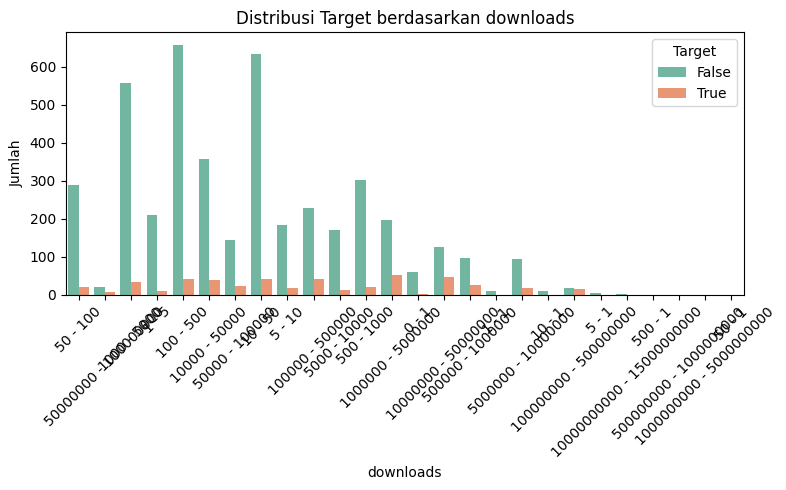

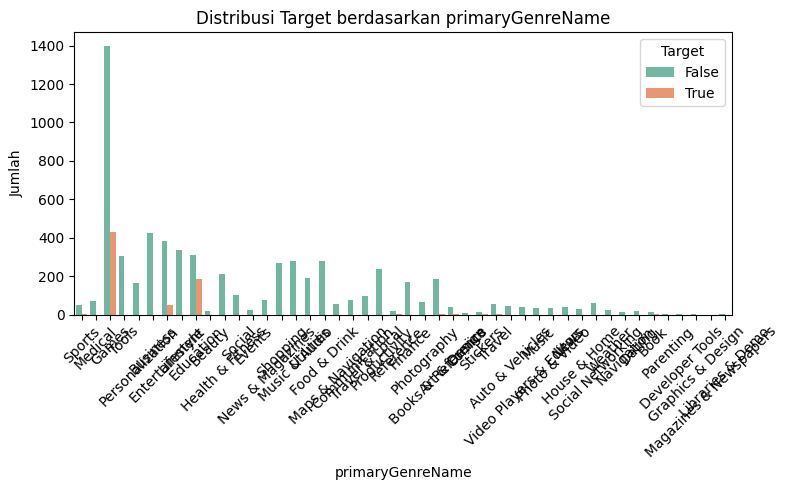

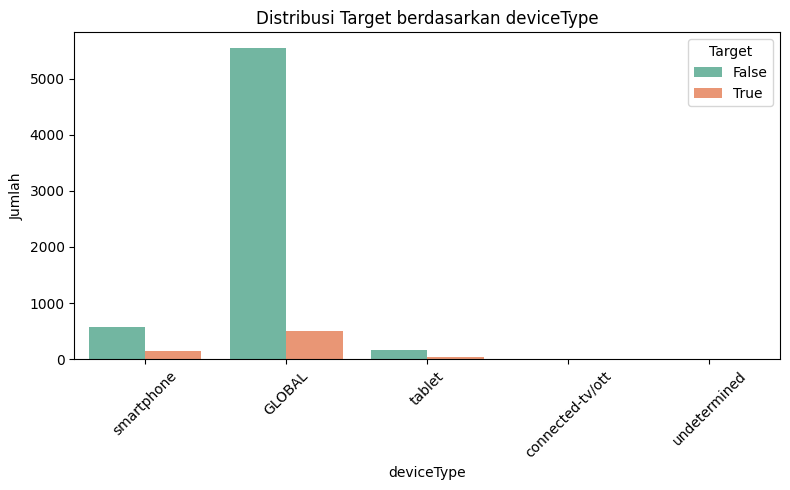

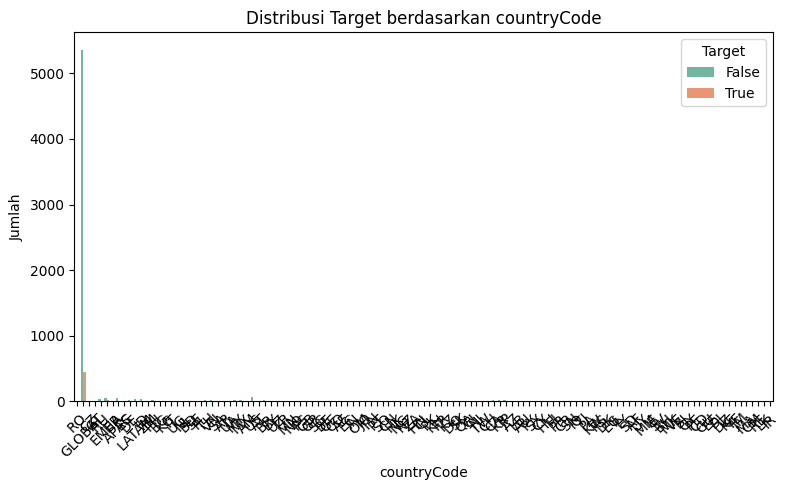

In [2705]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur kategorikal — ganti ini dengan daftar kolom kategorikal di dataset kamu
categorical_features = ['downloads', 'primaryGenreName','deviceType','countryCode']  # <-- ganti sesuai dataset

# Membuat plot
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, hue="coppaRisk", palette='Set2')
    plt.title(f'Distribusi Target berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.legend(title='Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Data Preprocessing

In [2706]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['coppaRisk'])
y = train['coppaRisk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)



In [2707]:
X_train = X_train.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])
X_test = X_test.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])
test = test.drop(columns=["hasTermsOfServiceLink", "hasTermsOfServiceLinkRating", "adSpent","appContentBrandSafetyRating","developerCountry","hasPrivacyLink","countryCode"])

In [2708]:
from sklearn.impute import SimpleImputer
X_train.replace('', np.nan, inplace=True)
X_test.replace('', np.nan, inplace=True)

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols1 = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_cols1 = X_test.select_dtypes(include=['object']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Imputasi untuk kolom numerik
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[numeric_cols1] = numeric_imputer.transform(X_test[numeric_cols1])
X_test[categorical_cols1] = categorical_imputer.transform(X_test[categorical_cols1])
test[numeric_cols1] = numeric_imputer.transform(test[numeric_cols1])
test[categorical_cols1] = categorical_imputer.transform(test[categorical_cols1])
# test[numeric_cols1] = numeric_imputer.fit_transform(test[numeric_cols1])

In [2709]:
import pandas as pd
import numpy as np

def parse_download_range(s):
    try:
        s = s.replace(",", "").strip()
        parts = s.split(" - ")
        if len(parts) != 2:
            return np.nan
        low, high = sorted([int(parts[0]), int(parts[1])])  # pastikan low < high
        return (low + high) / 2
    except:
        return np.nan

# X_train['Downloads_numeric'] = X_train['downloads'].apply(parse_download_range)
# # # X_train['Downloads_numeric'] = np.log1p(X_train['Downloads_numeric'])
# X_test['Downloads_numeric'] = X_test['downloads'].apply(parse_download_range)
# # # X_test['Downloads_numeric'] = np.log1p(X_test['Downloads_numeric'])
# test['Downloads_numeric'] = test['downloads'].apply(parse_download_range)
# # # test['Downloads_numeric'] = np.log1p(test['Downloads_numeric'])

In [2710]:
X_train.head()

,userRatingCount,primaryGenreName,downloads,deviceType,isCorporateEmailScore,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating
4823,0.0,Utilities,100 - 500,GLOBAL,0.0,53.100000,0.0,low,low
2620,43.0,Finance,1000 - 5000,GLOBAL,0.0,37.333333,3.0,low,low
125,8.0,Tools,500 - 1000,GLOBAL,0.0,42.833333,4.0,low,low
5125,1183.0,Personalization,500000 - 1000000,smartphone,0.0,4.166667,4.0,low,low
3759,12.0,Travel & Local,100 - 500,GLOBAL,0.0,89.766667,5.0,low,low


In [2711]:

def interactions(X_train):
    X_train['genre_device'] = X_train['primaryGenreName'] + "_" + X_train['deviceType']
    X_train['genre_safety'] = X_train['primaryGenreName'] + "_" + X_train['appDescriptionBrandSafetyRating']
    X_train['iscor'] = X_train['isCorporateEmailScore'].astype(str) + "_" + X_train['primaryGenreName'].astype(str)

    X_train['weightedRating'] = (X_train['averageUserRating'] * np.log1p(X_train['userRatingCount'])) / 5
    X_train['deviceType'] = X_train['deviceType'].apply(
        lambda x: 'GLOBAL' if x == 'GLOBAL' else 'others'
    )
    
    # My custom features for my friend
    
    # X_train['is_genre_education'] = (X_train['primaryGenreName'] == 'Education').astype(int) # ?worsened the auc score
    # # X_train['is_genre_games'] = (X_train['primaryGenreName'] == 'Games').astype(int) # ?worsened the auc score
    # # X_train['is_genre_stickers'] = (X_train['primaryGenreName'] == 'Stickers').astype(int)# ?worsened the auc score
    
    # Define genre risk levels
    # high_risk_genres = ['Education', 'Stickers', 'Games']
    # medium_risk_genres = ['Reference', 'Entertainment']
    # X_train['genre_risk_level'] = X_train['primaryGenreName'].apply(  # ?worsened the auc score
    #     lambda x: 2 if x in high_risk_genres else
    #                 (1 if x in medium_risk_genres else 0)
    # )
    
    # count_col = pd.to_numeric(X_train['userRatingCount'], errors='coerce').fillna(0)
    # rating_col = pd.to_numeric(X_train['averageUserRating'], errors='coerce').fillna(0)
    # X_train['weighted_user_rating'] = count_col * rating_col # ?worsened the auc score
    
    
    # desc_safety_map = {'low': 0, 'medium': 0.5, 'high': 1}
    # desc_safety_numeric = X_train['appDescriptionBrandSafetyRating'].fillna('medium').map(desc_safety_map)
    # count_normalized = pd.to_numeric(X_train['userRatingCount'], errors='coerce').fillna(0)
    # count_normalized = np.minimum(count_normalized / 10000, 1)
    # X_train['safety_engagement_ratio'] = count_normalized * (1 - desc_safety_numeric)
    
    # if 'avg_downloads' not in X_train.columns and 'downloads' in X_train.columns:
    #     # Process downloads column to create avg_downloads
    #     def extract_min_max(download_str):
    #         if pd.isna(download_str):
    #             return np.nan, np.nan
    #         try:
    #             parts = download_str.split(' - ')
    #             if len(parts) == 2:
    #                 val1 = int(parts[0])
    #                 val2 = int(parts[1])
    #                 # make sure min is always smaller value
    #                 min_val = min(val1, val2)
    #                 max_val = max(val1, val2)
    #                 return min_val, max_val
    #             else:
    #                 return np.nan, np.nan
    #         except:
    #             return np.nan, np.nan
    #     X_train['min_downloads'] = X_train['downloads'].apply(lambda x: extract_min_max(x)[0] if not pd.isna(x) else np.nan)  # ?worsened the auc score
    #     X_train['max_downloads'] = X_train['downloads'].apply(lambda x: extract_min_max(x)[1] if not pd.isna(x) else np.nan)  # ?worsened the auc score
    #     X_train['avg_downloads'] = (X_train['min_downloads'] + X_train['max_downloads']) / 2
    
    # # Create downloads_per_day feature using avg_downloads
    # avg_downloads = pd.to_numeric(X_train['avg_downloads'], errors='coerce').fillna(0)
    # app_age = pd.to_numeric(X_train['appAge'], errors='coerce').fillna(365)
    
    # # Add 1 to age to prevent division by zero for new apps
    # X_train['downloads_per_day'] = avg_downloads / (app_age + 1)   # ?worsened the auc score
    # X_train = X_train.drop(columns=['min_downloads', 'max_downloads', 'avg_downloads'])

    return X_train

def apply_feature_engineering(X: pd.DataFrame) -> pd.DataFrame:
    X = interactions(X)
    return X

In [2712]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4823 to 4141
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userRatingCount                  5597 non-null   float64
 1   primaryGenreName                 5597 non-null   object 
 2   downloads                        5597 non-null   object 
 3   deviceType                       5597 non-null   object 
 4   isCorporateEmailScore            5597 non-null   float64
 5   appAge                           5597 non-null   float64
 6   averageUserRating                5597 non-null   float64
 7   appDescriptionBrandSafetyRating  5597 non-null   object 
 8   mfaRating                        5597 non-null   object 
dtypes: float64(4), object(5)
memory usage: 437.3+ KB


In [2713]:
X_train = apply_feature_engineering(X_train)
X_test = apply_feature_engineering(X_test)
test = apply_feature_engineering(test)

In [2714]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clipping menggunakan IQR method
Q1 = X_train['userRatingCount'].quantile(0.25)
Q3 = X_train['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_train['userRatingCount'] = X_train['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

Q1 = X_test['userRatingCount'].quantile(0.25)
Q3 = X_test['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X_test['userRatingCount'] = X_test['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

Q1 = test['userRatingCount'].quantile(0.25)
Q3 = test['userRatingCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test['userRatingCount'] = test['userRatingCount'].clip(lower=lower_bound, upper=upper_bound)

# 2. Transformasi log (tambahkan 1 untuk hindari log(0))
# X_train['userRatingCount'] = np.log1p(X_train['userRatingCount'])
# X_train['appAge'] = np.log1p(X_train['appAge'])

# X_test['userRatingCount'] = np.log1p(X_test['userRatingCount'])
# X_test['appAge'] = np.log1p(X_test['appAge'])

# # 2. Transformasi log (tambahkan 1 untuk hindari log(0))
# test['userRatingCount'] = np.log1p(test['userRatingCount'])
# test['appAge'] = np.log1p(test['appAge'])


In [2715]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

def auto_transform_features_v2(X_train: pd.DataFrame, 
                                X_val: pd.DataFrame, 
                                X_test: pd.DataFrame, 
                                skew_threshold: float = 1.0, 
                                target_column: str = 'label') -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    
    transformer_dict = {}

    for col in X_train.columns:
        if col != target_column and np.issubdtype(X_train[col].dtype, np.number):
            # Handle missing values
            X_train[col].fillna(0, inplace=True)
            X_val[col].fillna(0, inplace=True)
            X_test[col].fillna(0, inplace=True)
            
            # Compute skewness
            skewness = X_train[col].skew()
            if abs(skewness) > skew_threshold:
                if skewness > 0:
                    X_train[col] = np.log1p(X_train[col].clip(lower=0))
                    X_val[col] = np.log1p(X_val[col].clip(lower=0))
                    X_test[col] = np.log1p(X_test[col].clip(lower=0))
                    transformer_dict[col] = 'log1p'
                else:
                    if X_train[col].var() > 0:
                        transformer = PowerTransformer(method='yeo-johnson')
                        X_train[col] = pd.Series(transformer.fit_transform(X_train[col].values.reshape(-1, 1)).flatten(), index=X_train.index)
                        X_val[col] = pd.Series(transformer.transform(X_val[col].values.reshape(-1, 1)).flatten(), index=X_val.index)
                        X_test[col] = pd.Series(transformer.transform(X_test[col].values.reshape(-1, 1)).flatten(), index=X_test.index)
                        transformer_dict[col] = transformer
                    else:
                        print(f"Skipping column {col} due to zero variance.")

    return X_train, X_val, X_test



X_train, X_test, test = auto_transform_features_v2(X_train.copy(), X_test.copy(),test.copy())

# Modeling

In [2716]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")


Class Weights: {0: np.float64(0.5552579365079365), 1: np.float64(5.024236983842011)}


In [2717]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4823 to 4141
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   userRatingCount                  5597 non-null   float64
 1   primaryGenreName                 5597 non-null   object 
 2   downloads                        5597 non-null   object 
 3   deviceType                       5597 non-null   object 
 4   isCorporateEmailScore            5597 non-null   float64
 5   appAge                           5597 non-null   float64
 6   averageUserRating                5597 non-null   float64
 7   appDescriptionBrandSafetyRating  5597 non-null   object 
 8   mfaRating                        5597 non-null   object 
 9   genre_device                     5597 non-null   object 
 10  genre_safety                     5597 non-null   object 
 11  iscor                            5597 non-null   object 
 12  weightedRating        

0:	test: 0.8406911	best: 0.8406911 (0)	total: 10.6ms	remaining: 5.28s
50:	test: 0.8988727	best: 0.8993034 (41)	total: 359ms	remaining: 3.16s
100:	test: 0.9034625	best: 0.9064349 (79)	total: 622ms	remaining: 2.46s
150:	test: 0.9010863	best: 0.9064349 (79)	total: 894ms	remaining: 2.06s
200:	test: 0.9040444	best: 0.9064349 (79)	total: 1.17s	remaining: 1.75s
250:	test: 0.9023813	best: 0.9064349 (79)	total: 1.46s	remaining: 1.45s
300:	test: 0.9008210	best: 0.9064349 (79)	total: 1.74s	remaining: 1.15s
350:	test: 0.8998226	best: 0.9064349 (79)	total: 2.03s	remaining: 861ms
400:	test: 0.8972723	best: 0.9064349 (79)	total: 2.31s	remaining: 570ms
450:	test: 0.8965193	best: 0.9064349 (79)	total: 2.59s	remaining: 281ms
499:	test: 0.8954695	best: 0.9064349 (79)	total: 2.86s	remaining: 0us

bestTest = 0.9064348838
bestIteration = 79

Shrink model to first 80 iterations.
=== Classification Report (CatBoost - Before SMOTE) ===
              precision    recall  f1-score   support

       False       0

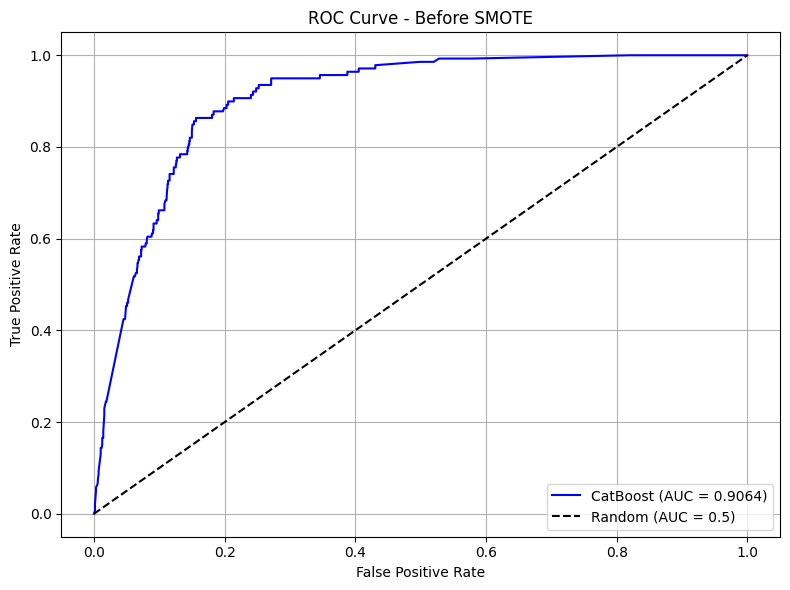


🔍 Top 10 Feature Importance:
                            Feature  Importance
1                  primaryGenreName   42.706068
10                     genre_safety   29.114799
11                            iscor   15.397712
12                   weightedRating    4.421791
5                            appAge    2.530290
9                      genre_device    2.100236
7   appDescriptionBrandSafetyRating    1.515768
0                   userRatingCount    0.918798
2                         downloads    0.672051
6                 averageUserRating    0.345223


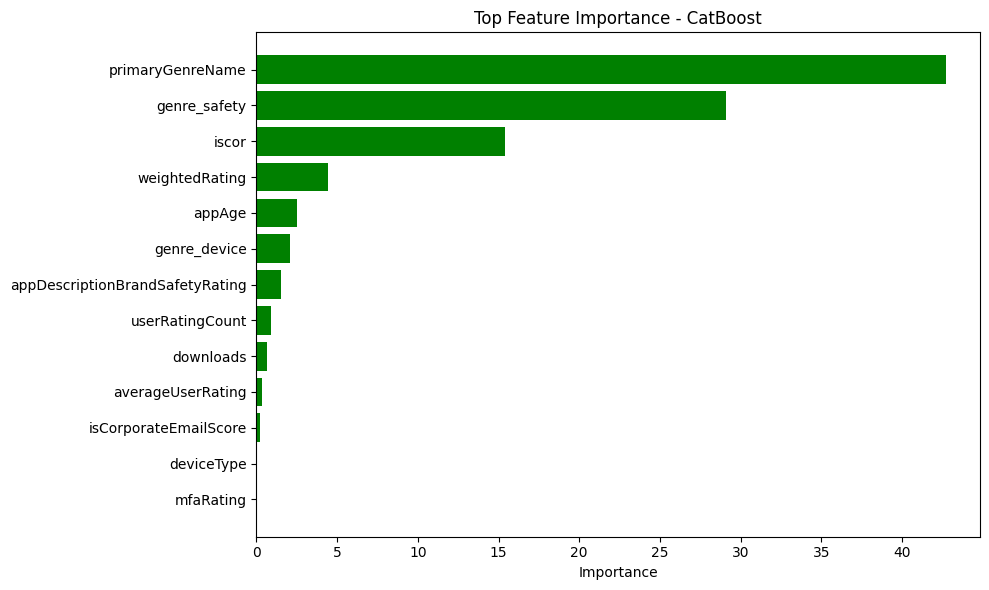

In [2718]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Daftar fitur kategorikal
cat_features = [
    # 'countryCode',
    'primaryGenreName',
    'downloads',
    'deviceType',
    'appDescriptionBrandSafetyRating',
    'mfaRating',
    'genre_device',
    'genre_safety',
    'iscor',
    
]
# [I 2025-04-18 09:46:20,155] Trial 144 finished with value: 0.9054992326519435 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.038443271304354515, 'depth': 9, 'l2_leaf_reg': 3, 'random_strength': 3.1244167897512546e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6905170723090944}. Best is trial 144 with value: 0.9054992326519435.
# [I 2025-04-18 09:47:33,484] Trial 152 finished with value: 0.905795902532534 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.03359101812662808, 'depth': 10, 'l2_leaf_reg': 4, 'random_strength': 4.021667422239279e-05, 'border_count': 40, 'grow_policy': 'Lossguide', 'subsample': 0.6281935933158131}. Best is trial 152 with value: 0.905795902532534.
# [I 2025-04-18 09:50:38,668] Trial 172 finished with value: 0.9071366221852019 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.03164067519042084, 'depth': 10, 'l2_leaf_reg': 4, 'random_strength': 6.574940366297763e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6168892917390454}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 09:50:54,424] Trial 174 finished with value: 0.9040929033141449 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.0342174739254404, 'depth': 10, 'l2_leaf_reg': 5, 'random_strength': 8.711674364271729e-06, 'border_count': 36, 'grow_policy': 'Lossguide', 'subsample': 0.6287793410400394}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 09:51:31,021] Trial 178 finished with value: 0.905159773846268 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02953811960842584, 'depth': 10, 'l2_leaf_reg': 3, 'random_strength': 1.834896712403984e-05, 'border_count': 43, 'grow_policy': 'Lossguide', 'subsample': 0.6205000665716732}. Best is trial 172 with value: 0.9071366221852019.
# [I 2025-04-18 10:55:50,353] Trial 515 finished with value: 0.9044637406648828 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02586180743892376, 'depth': 10, 'l2_leaf_reg': 1, 'random_strength': 5.8230660847065055e-06, 'border_count': 32, 'grow_policy': 'Lossguide', 'subsample': 0.7832435446707663}. Best is trial 180 with value: 0.9078469183416153.
# [I 2025-04-18 10:56:00,348] Trial 516 finished with value: 0.9079496117618197 and parameters: {'bootstrap_type': 'Bernoulli', 'learning_rate': 0.02884194381136804, 'depth': 10, 'l2_leaf_reg': 2, 'random_strength': 4.213219956615579e-06, 'border_count': 34, 'grow_policy': 'Lossguide', 'subsample': 0.7619383940741274}. Best is trial 516 with value: 0.9079496117618197.

# # 0.9045 & K-fold 0.8903
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.02586180743892376,
#   'depth': 10,
#   'l2_leaf_reg': 1,
#   'random_strength': 5.8230660847065055e-06,
#   'border_count': 32,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.7832435446707663
# }

# # 0.9055 & K-fold 0.8894
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.038443271304354515,
#   'depth': 9,
#   'l2_leaf_reg': 3,
#   'random_strength': 3.1244167897512546e-06,
#   'border_count': 36,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6905170723090944
# }

# # 0.9058 & K-fold 0.8903
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.03359101812662808,
#   'depth': 10,
#   'l2_leaf_reg': 4,
#   'random_strength': 4.021667422239279e-05,
#   'border_count': 40,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6281935933158131
# }

## 0.9071 & K-fold 0.8888
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
#   'learning_rate': 0.03164067519042084,
#   'depth': 10,
#   'l2_leaf_reg': 4,
#   'random_strength': 6.574940366297763e-06,
#   'border_count': 36,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.6168892917390454
# }

# 0.9079 & K-fold 0.8921
# cat_params = {
#   'bootstrap_type': 'Bernoulli',
# #   'learning_rate': 0.02884194381136804,
#   'depth': 10,
#   'l2_leaf_reg': 2,
# #   'l2_leaf_reg': 4,
#   'random_strength': 4.213219956615579e-06,
#   'border_count': 34,
#   'grow_policy': 'Lossguide',
#   'subsample': 0.7619383940741274
# }

# 0.9066 & K-fold 0.8910
cat_params = {
  'bootstrap_type': 'Bernoulli',
  'learning_rate': 0.015735421307249614,
  'depth': 10,
#   'depth': 14,
#   'depth': 20,
#   'depth': 12,
  'l2_leaf_reg': 4,
#   'l2_leaf_reg': 8,
#   'l2_leaf_reg': 12,
  'random_strength': 2.9291290971442743e-06,
  'border_count': 153,
  'grow_policy': 'Lossguide'
}

# Inisialisasi & training CatBoost
model = CatBoostClassifier(
    iterations=500,
    eval_metric='AUC',
    verbose=50,
    auto_class_weights='Balanced',
    use_best_model=True,
    random_seed=42,
    **cat_params
)

model.fit(X_train, y_train, cat_features=cat_features,eval_set=(X_test,y_test))

# Prediksi & Laporan Klasifikasi
y_pred = model.predict(X_test)
print("=== Classification Report (CatBoost - Before SMOTE) ===")
print(classification_report(y_test, y_pred))

# ROC AUC Score
y_scores = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_scores)
print(f"\n📈 AUC Score (CatBoost - Before SMOTE): {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Before SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# FEATURE IMPORTANCE
importances = model.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features))
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

print("\n🔍 Top 10 Feature Importance:")
print(importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="green")
plt.gca().invert_yaxis()
plt.title("Top Feature Importance - CatBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [2719]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from catboost import CatBoostClassifier, Pool

# # Hyperparameter model
# cat_params = {
#     'iterations': 500,
#     'eval_metric': 'AUC',
#     'loss_function': 'Logloss',
#     'verbose': False,
#     'random_seed': 42,
#     'use_best_model': False
# }

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# auc_scores = []

# plt.figure(figsize=(12, 8))

# for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
#     X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
#     y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

#     # model = CatBoostClassifier(**cat_params)
    
#     model.fit(
#         X_tr, y_tr,
#         eval_set=(X_val, y_val),
#         cat_features=cat_features,
#         verbose=False
#     )

#     # Prediksi dan simpan AUC
#     y_val_pred_proba = model.predict_proba(X_val)[:, 1]
#     auc = roc_auc_score(y_val, y_val_pred_proba)
#     auc_scores.append(auc)
#     print(f"Fold {fold+1} AUC: {auc:.4f}")

#     # Ambil learning curve (evals_result_)
#     results = model.evals_result_
#     eval_auc = results['validation']['AUC']
#     plt.plot(eval_auc, label=f'Fold {fold+1}')

# # Plot learning curve
# plt.title("📈 CatBoost Validation AUC per Iteration (CV Folds)")
# plt.xlabel("Iterations")
# plt.ylabel("Validation AUC")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# print(f"\n🔁 Mean AUC CV: {np.mean(auc_scores):.4f}")

In [2720]:
test.drop(columns='ID', inplace=True)

In [2721]:
submission = pd.read_csv('submission_format.csv')  # Pastikan ada file submission_format.csv
submission['coppaRisk'] = model.predict_proba(test)[:, 1]

# Save the submission file
submission.to_csv('submission_9064.csv', index=False)

# Check the submission file
submission.head(20)


,ID,coppaRisk
0,2807,0.088401
1,1742,0.649065
2,806,0.745691
3,2635,0.267542
4,9047,0.091964
5,3048,0.093443
6,4691,0.784869
7,1346,0.519046
8,7045,0.093443
9,958,0.745691


In [2722]:
# stopper

In [2723]:
submission["coppaRisk"].mean()

np.float64(0.3025257556766899)

In [2724]:
# submission128957 = pd.read_csv('submission12.csv')  
# submission132a = pd.read_csv('submission (1).csv')  
# submissionk894 = pd.read_csv('ssubmission.csv')  
submissions = pd.read_csv('submissions.csv')  

FileNotFoundError: [Errno 2] No such file or directory: 'submissions.csv'